# Data Analysis and Visualization Notebook

This notebook analyzes a given dataset, displays statistics, and provides visualizations for each column to understand the distribution of the data. This analysis will help in deciding if any preprocessing, like scaling or normalization, is required to handle values close to 0, especially for quantization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Dataset
Provide the path to the dataset CSV file to load it.

In [2]:
# Load the dataset
dataset_path = './datasets/EDGE2022/balanced_binary/test.csv'
data = pd.read_csv(dataset_path)

# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140030 entries, 0 to 3140029
Data columns (total 41 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   ID                      int64  
 1   arp.opcode              float64
 2   arp.hw.size             float64
 3   icmp.checksum           float64
 4   icmp.seq_le             float64
 5   http.content_length     float64
 6   http.request.method     float64
 7   http.referer            float64
 8   http.request.version    float64
 9   http.response           int64  
 10  tcp.ack                 float64
 11  tcp.ack_raw             float64
 12  tcp.checksum            float64
 13  tcp.connection.fin      float64
 14  tcp.connection.rst      int64  
 15  tcp.connection.syn      float64
 16  tcp.connection.synack   float64
 17  tcp.flags               float64
 18  tcp.flags.ack           float64
 19  tcp.len                 float64
 20  tcp.seq                 float64
 21  udp.stream              float64

## Basic Statistics
Show basic statistics of the dataset.

In [3]:
# Display basic statistics
data.describe()

,ID,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,http.content_length,http.request.method,http.referer,http.request.version,http.response,...,mqtt.len,mqtt.msgtype,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,Label
count,3.140030e+06,3.140030e+06,3.140030e+06,3.140030e+06,3.140030e+06,3.140030e+06,3.140030e+06,3.140030e+06,3.140030e+06,3.140030e+06,...,3.140030e+06,3.140030e+06,3.140030e+06,3.140030e+06,3.140030e+06,3.140030e+06,3.140030e+06,3.140030e+06,3.140030e+06,3140030.0
mean,1.046515e+07,4.974930e-04,1.604399e-02,1.029547e-01,9.679326e-02,5.908445e-05,1.296994e-02,1.254526e-02,3.637101e-02,8.747369e-03,...,1.498718e-02,4.168798e-02,7.651917e-03,1.457773e-01,5.968881e-02,1.667580e-02,1.080445e-03,2.550969e-03,4.422301e-04,0.5
std,6.043240e+06,1.541964e-02,5.435288e-02,2.589997e-01,1.899110e-01,1.040559e-03,4.801736e-02,8.027484e-02,1.201192e-01,9.311743e-02,...,8.091044e-02,1.718446e-01,4.424896e-02,1.930191e-01,1.256186e-01,1.043663e-01,1.016612e-02,4.366439e-02,7.331008e-03,0.5
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,5.228616e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,1.046676e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.5
75%,1.569793e+07,0.000000e+00,0.000000e+00,0.000000e+00,3.087121e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e-01,8.333333e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0
max,2.093352e+07,8.571429e-01,1.000000e+00,1.000000e+00,9.999923e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.155080e-01,9.999796e-01,9.801325e-01,1.0


## Data Distribution and Analysis
Visualize the distribution of each column in the dataset and analyze how many values are close to 0.

Column: ID
Number of values close to 0: 1
Percentage of values close to 0: 0.00%


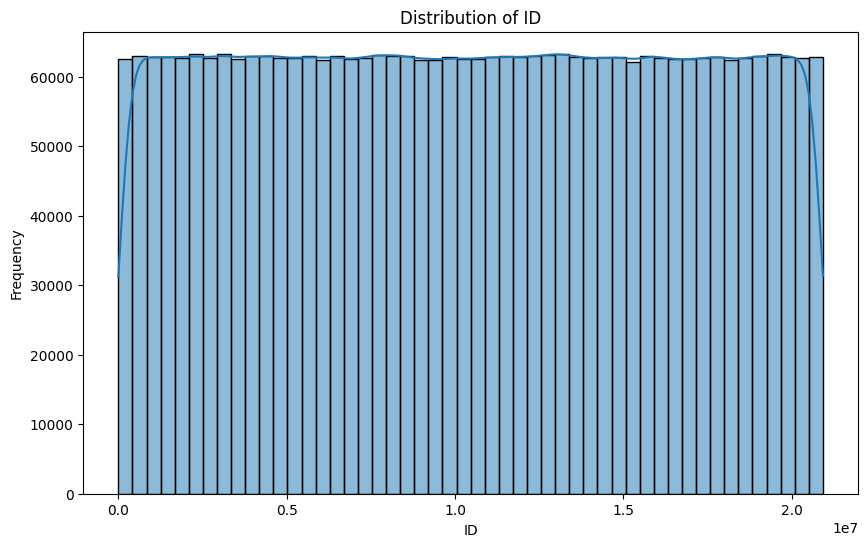



Column: arp.opcode
Number of values close to 0: 3135867
Percentage of values close to 0: 99.87%


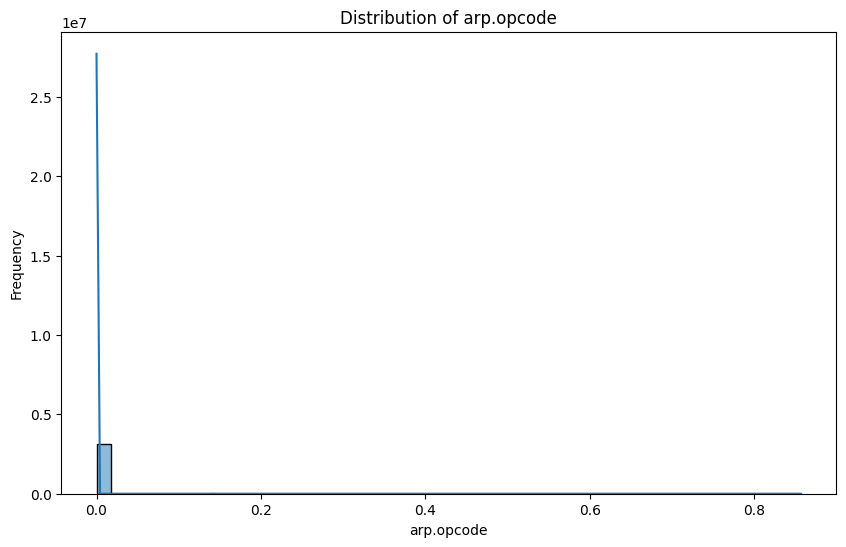



Column: arp.hw.size
Number of values close to 0: 2887285
Percentage of values close to 0: 91.95%


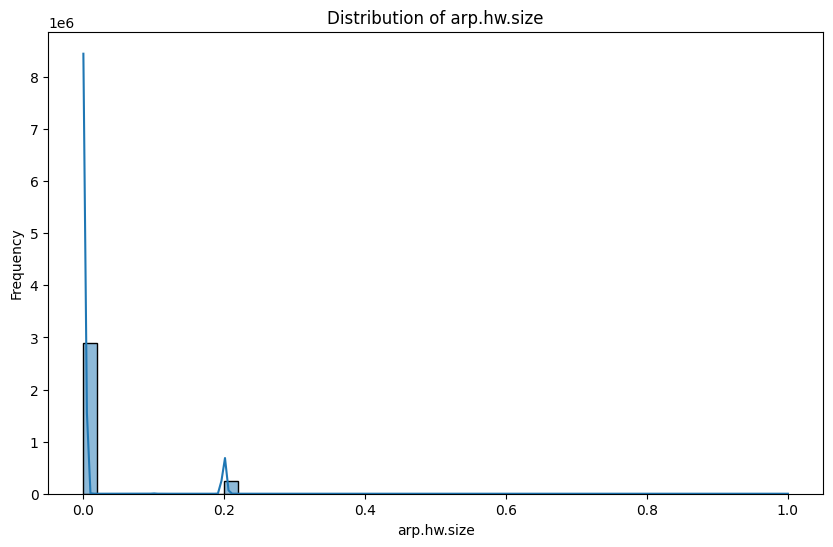



Column: icmp.checksum
Number of values close to 0: 2681353
Percentage of values close to 0: 85.39%


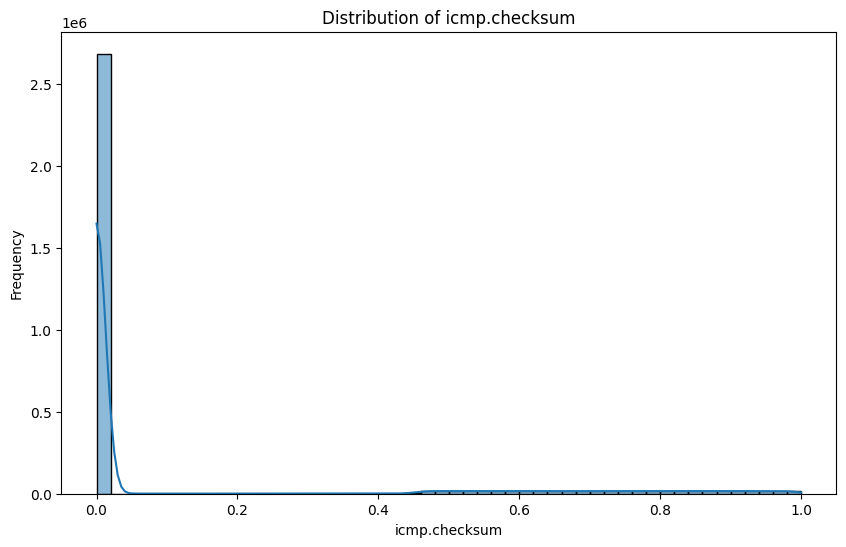



Column: icmp.seq_le
Number of values close to 0: 2328878
Percentage of values close to 0: 74.17%


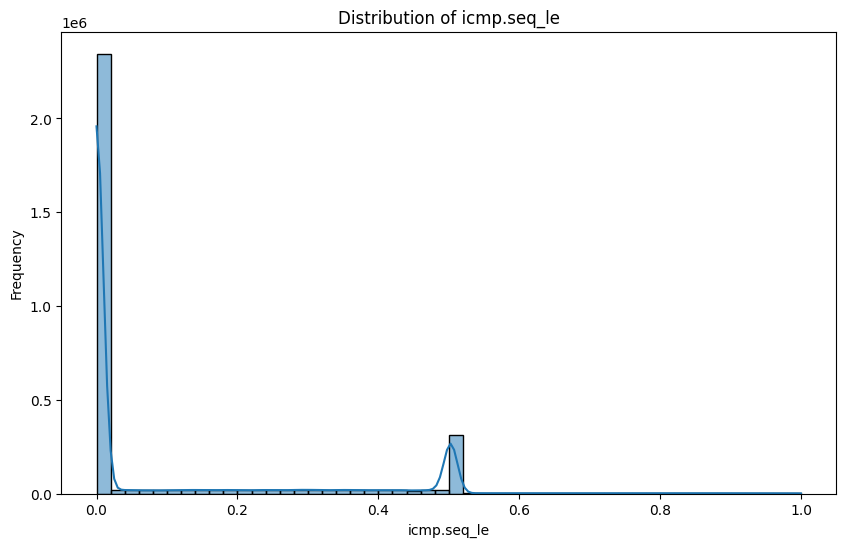



Column: http.content_length
Number of values close to 0: 3103475
Percentage of values close to 0: 98.84%


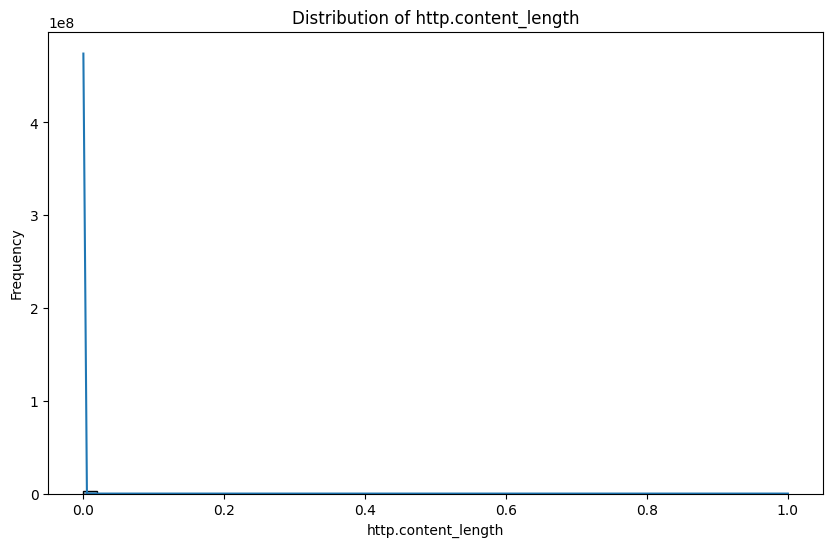



Column: http.request.method
Number of values close to 0: 2853954
Percentage of values close to 0: 90.89%


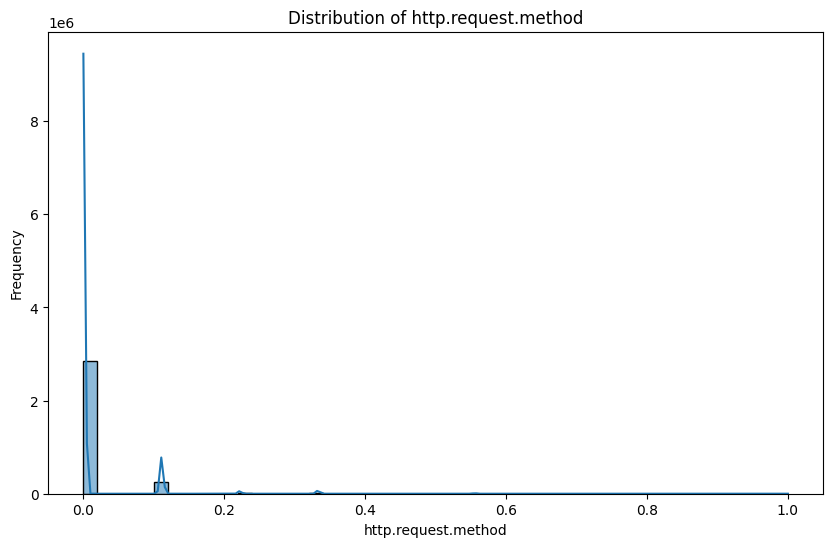



Column: http.referer
Number of values close to 0: 3064293
Percentage of values close to 0: 97.59%


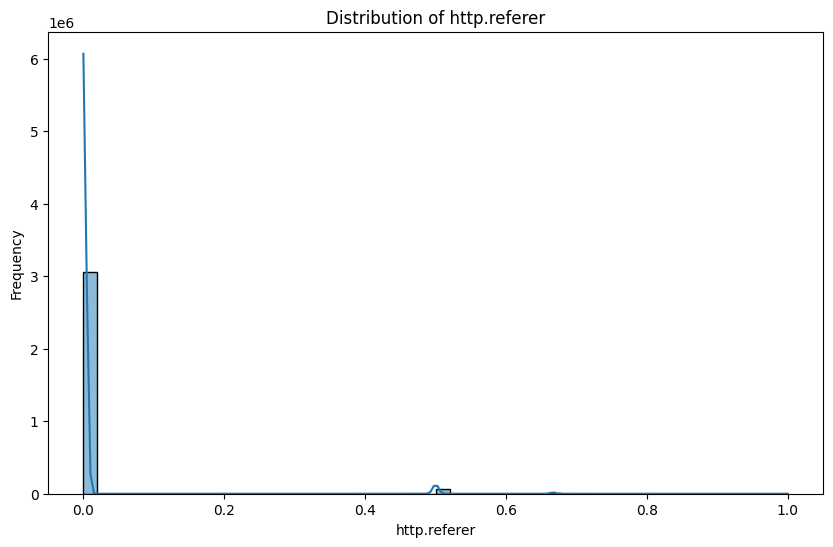



Column: http.request.version
Number of values close to 0: 2853775
Percentage of values close to 0: 90.88%


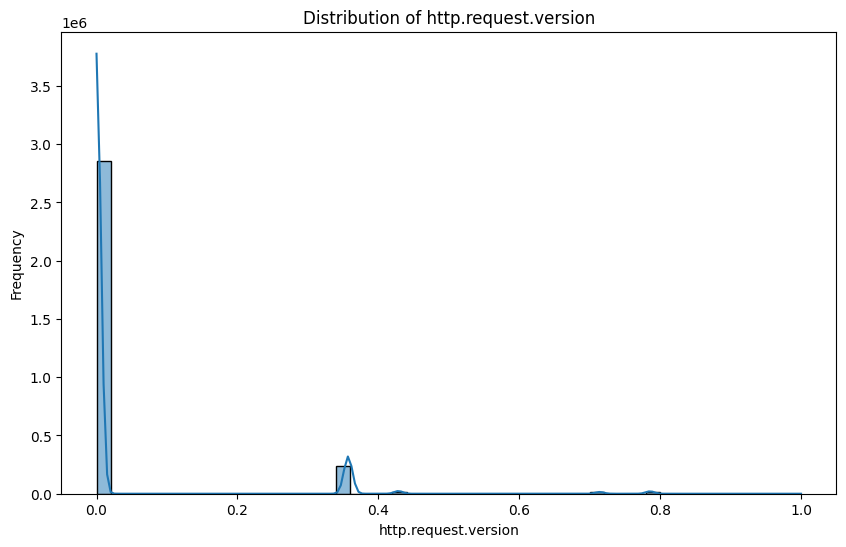



Column: http.response
Number of values close to 0: 3112563
Percentage of values close to 0: 99.13%


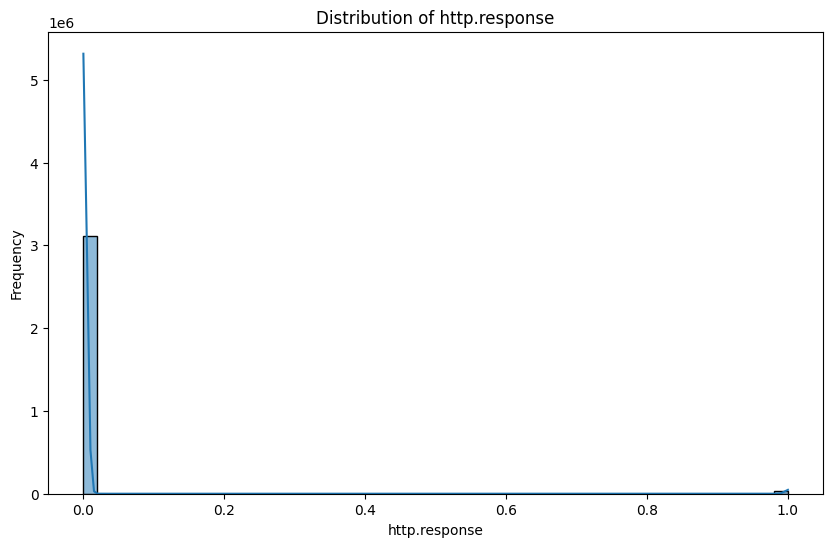



Column: tcp.ack
Number of values close to 0: 2840300
Percentage of values close to 0: 90.45%


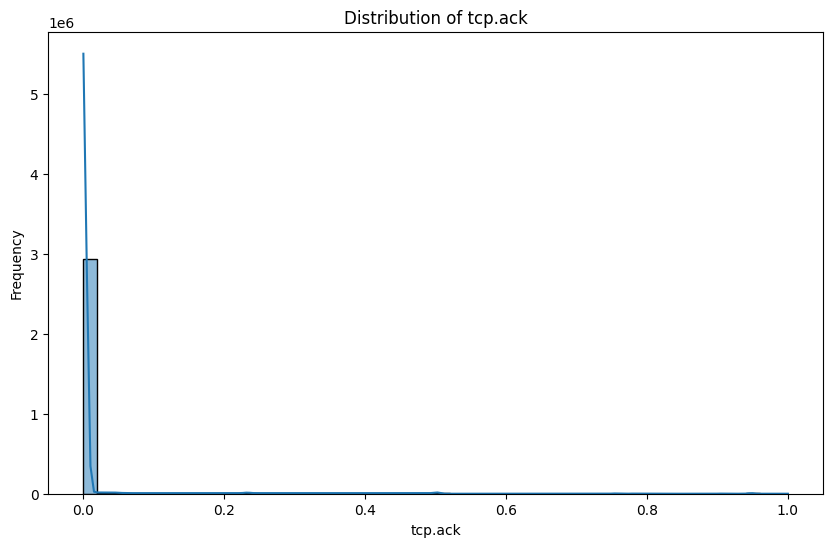



Column: tcp.ack_raw
Number of values close to 0: 1290764
Percentage of values close to 0: 41.11%


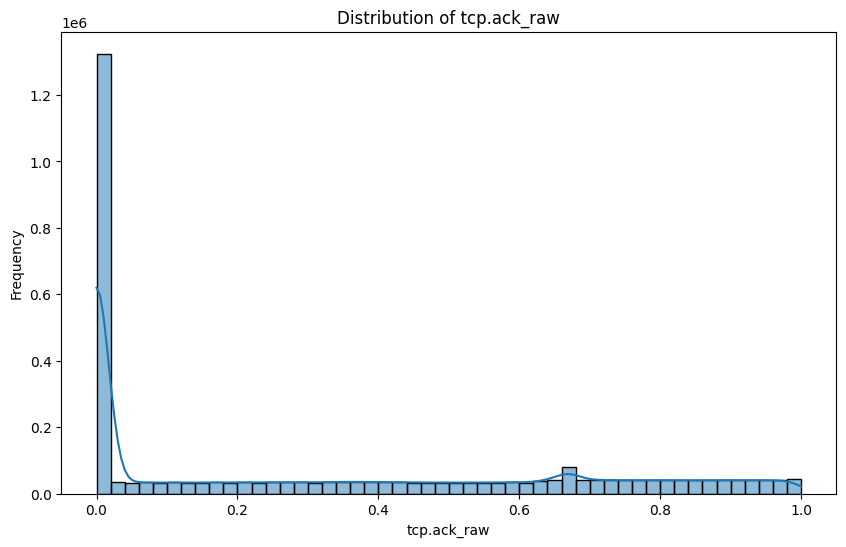



Column: tcp.checksum
Number of values close to 0: 980004
Percentage of values close to 0: 31.21%


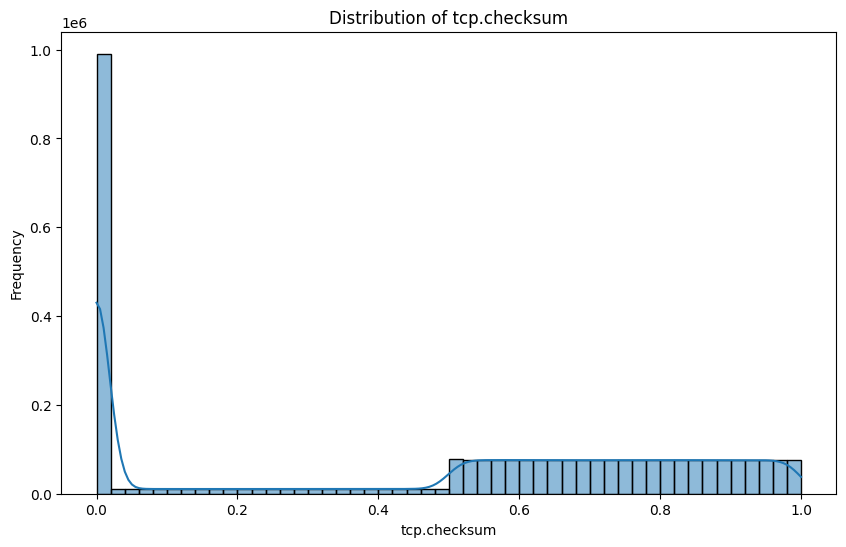



Column: tcp.connection.fin
Number of values close to 0: 2919638
Percentage of values close to 0: 92.98%


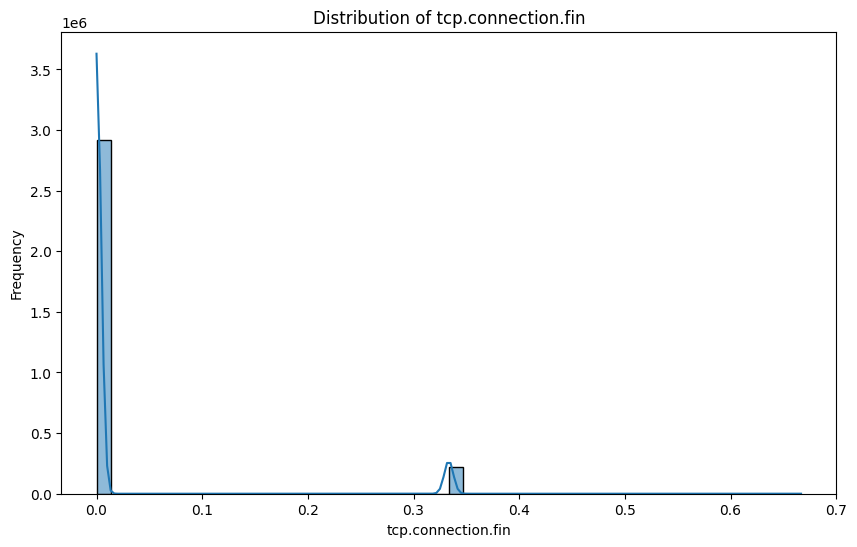



Column: tcp.connection.rst
Number of values close to 0: 2799948
Percentage of values close to 0: 89.17%


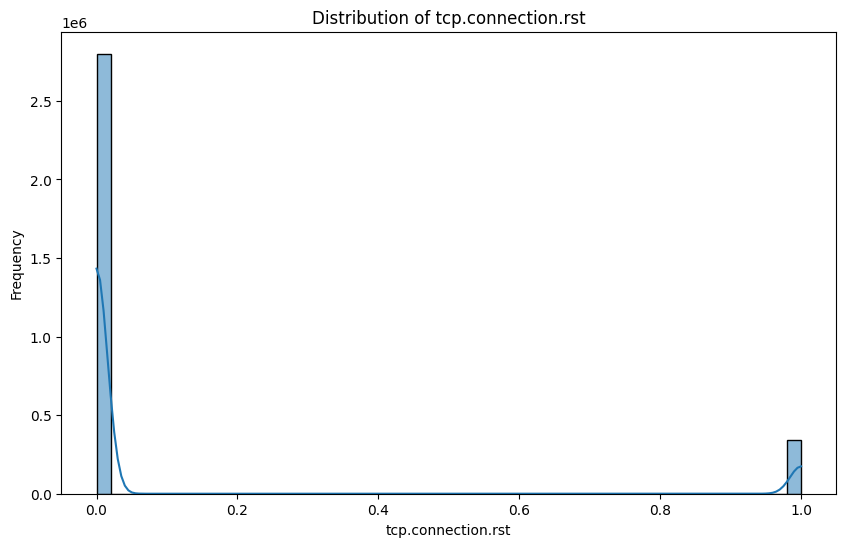



Column: tcp.connection.syn
Number of values close to 0: 2830957
Percentage of values close to 0: 90.16%


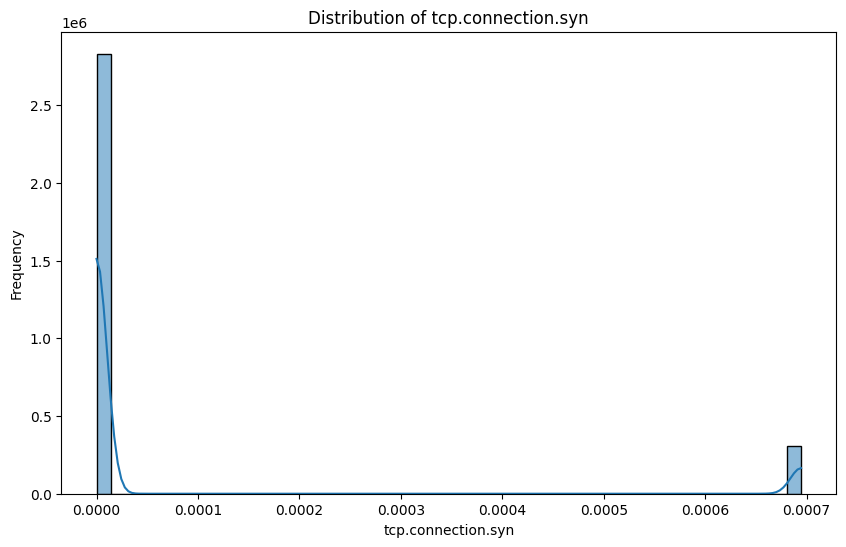



Column: tcp.connection.synack
Number of values close to 0: 3009363
Percentage of values close to 0: 95.84%


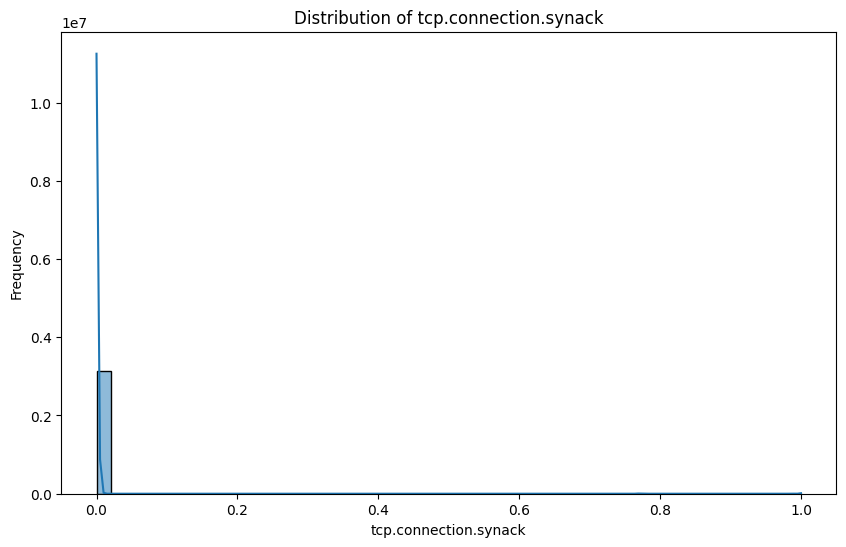



Column: tcp.flags
Number of values close to 0: 961066
Percentage of values close to 0: 30.61%


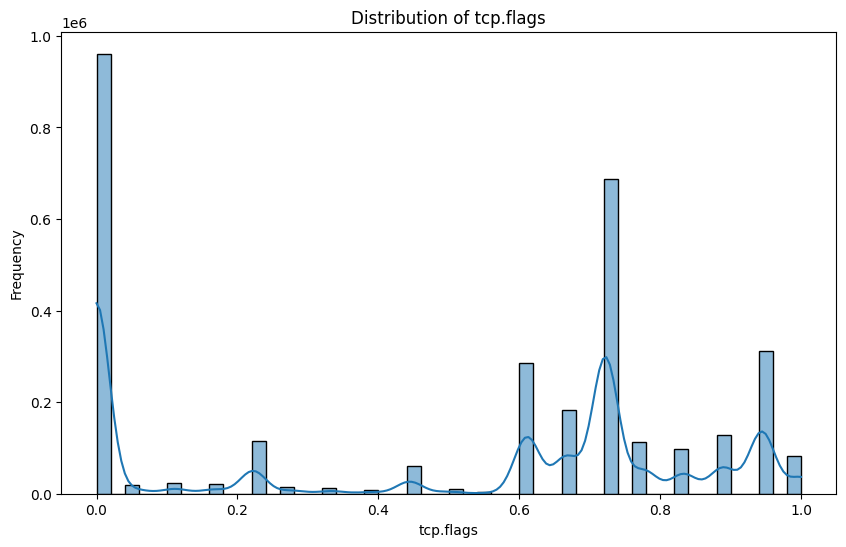



Column: tcp.flags.ack
Number of values close to 0: 1482432
Percentage of values close to 0: 47.21%


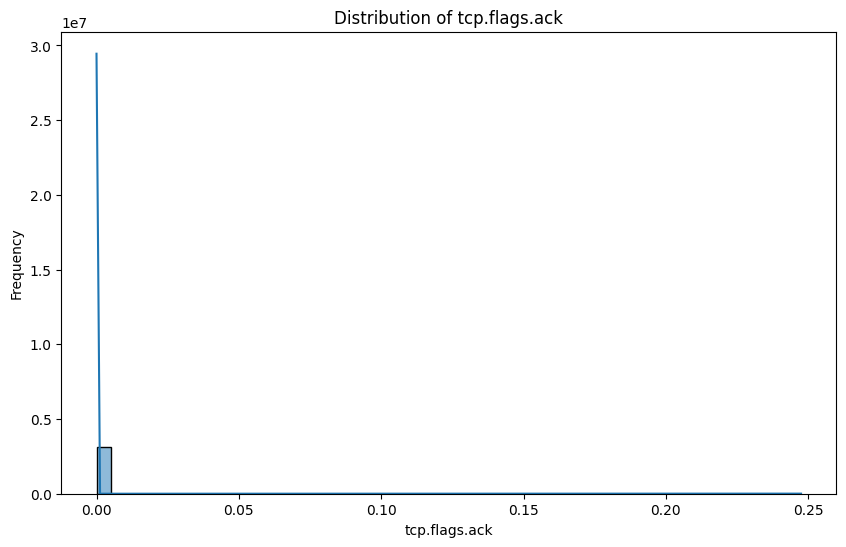



Column: tcp.len
Number of values close to 0: 2449150
Percentage of values close to 0: 78.00%


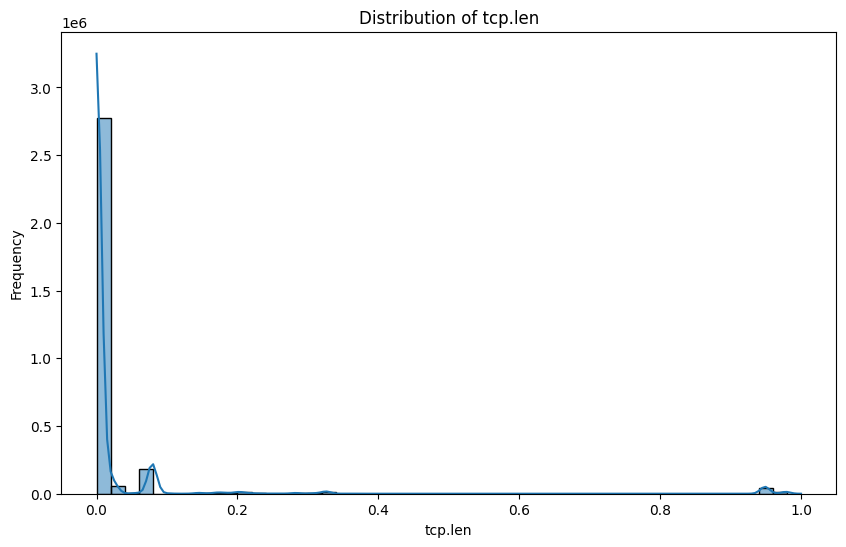



Column: tcp.seq
Number of values close to 0: 3031527
Percentage of values close to 0: 96.54%


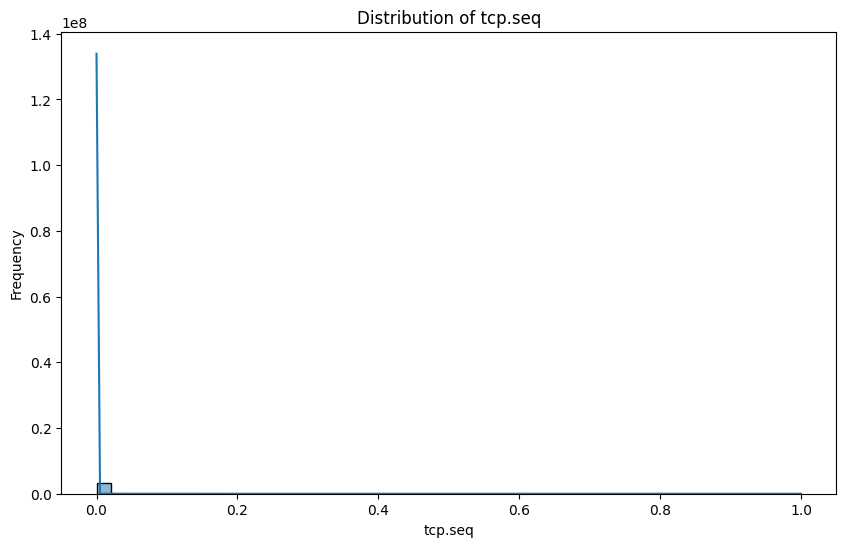



Column: udp.stream
Number of values close to 0: 2638283
Percentage of values close to 0: 84.02%


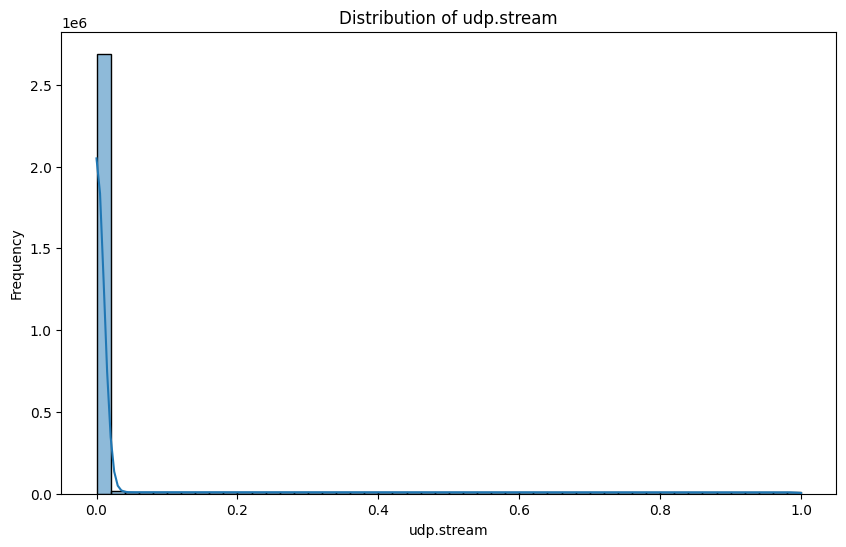



Column: udp.time_delta
Number of values close to 0: 3139260
Percentage of values close to 0: 99.98%


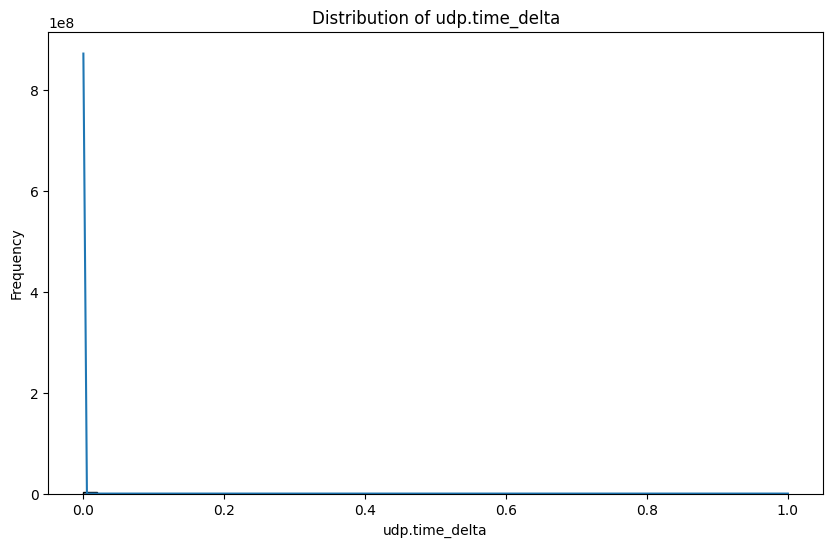



Column: dns.qry.name
Number of values close to 0: 3075942
Percentage of values close to 0: 97.96%


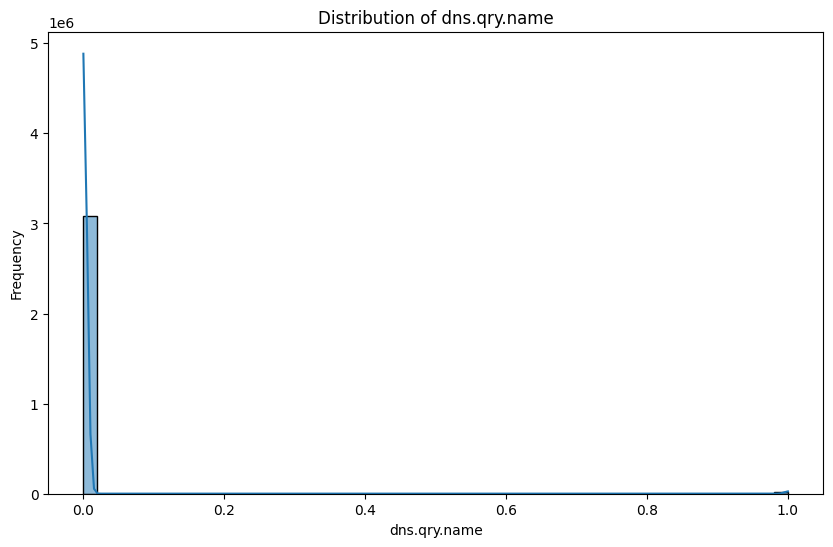



Column: dns.qry.name.len
Number of values close to 0: 3074331
Percentage of values close to 0: 97.91%


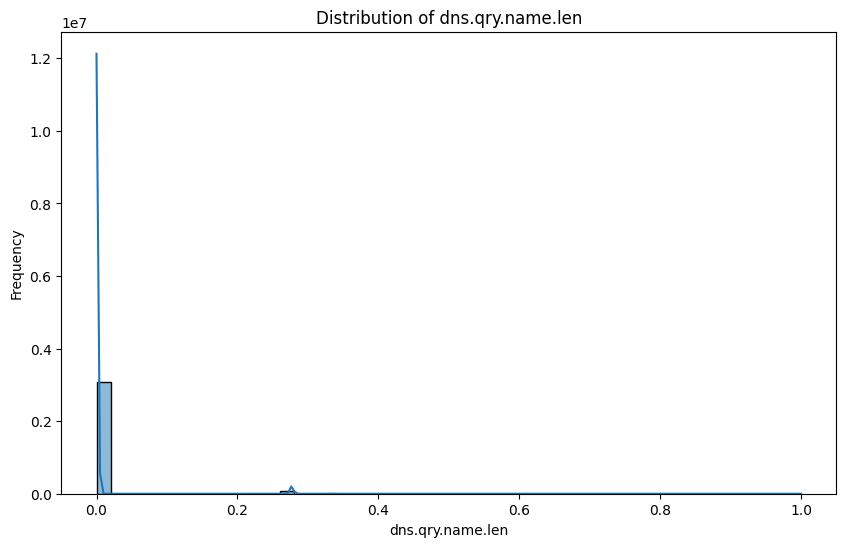



Column: dns.qry.qu
Number of values close to 0: 3118478
Percentage of values close to 0: 99.31%


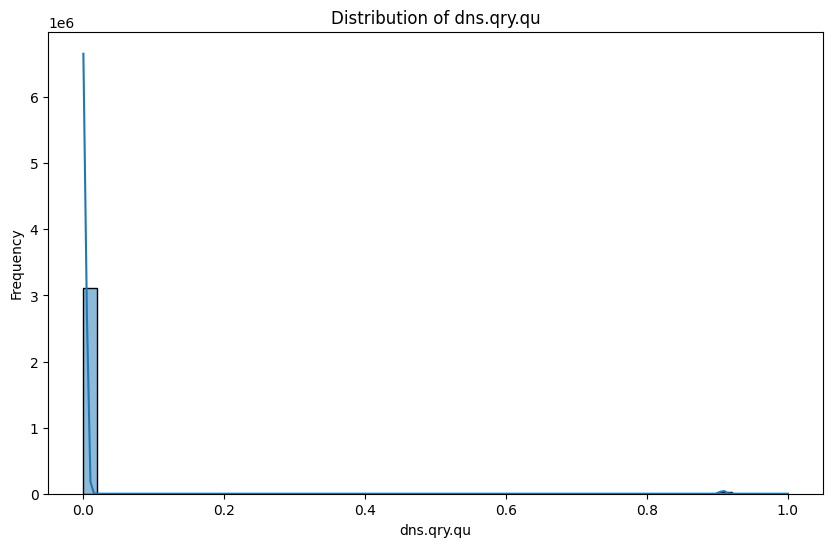



Column: dns.qry.type
Number of values close to 0: 3139668
Percentage of values close to 0: 99.99%


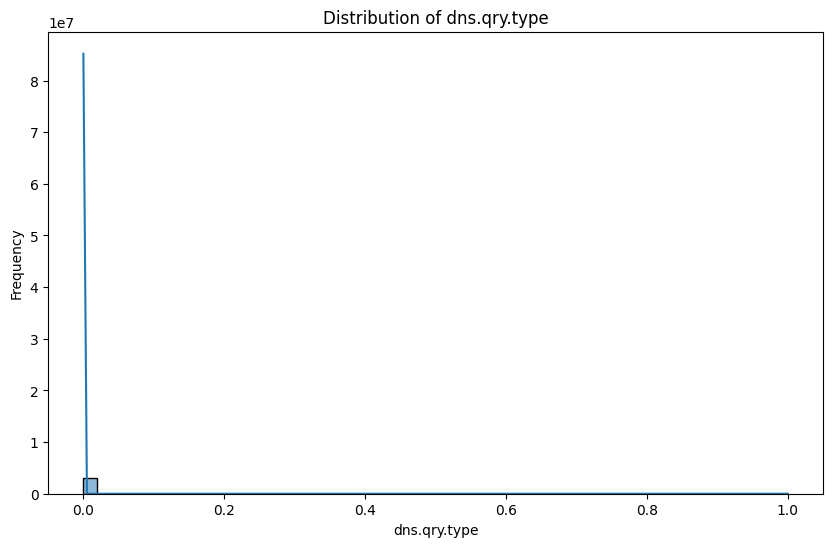



Column: mqtt.conack.flags
Number of values close to 0: 1587264
Percentage of values close to 0: 50.55%


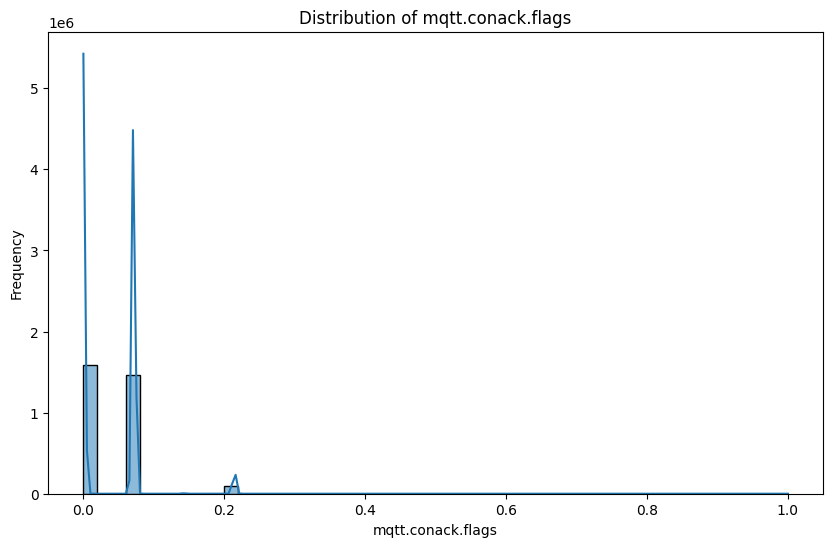



Column: mqtt.conflag.cleansess
Number of values close to 0: 3048014
Percentage of values close to 0: 97.07%


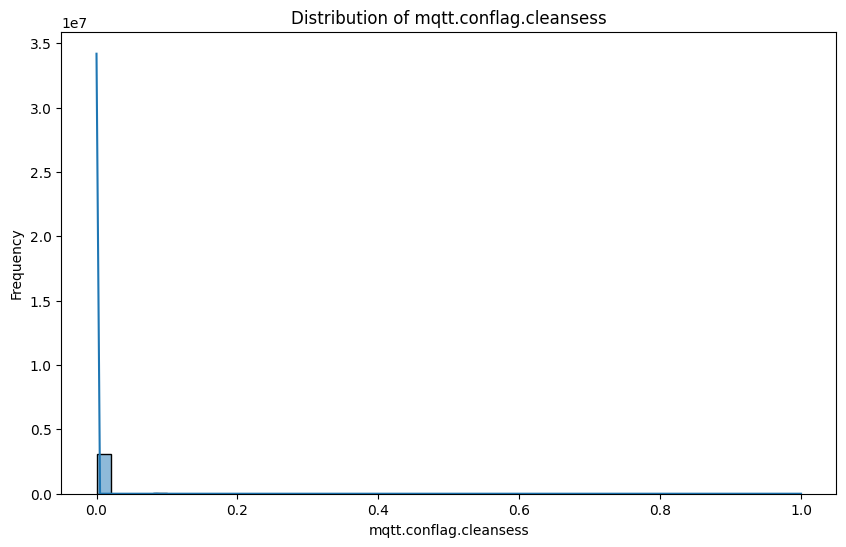



Column: mqtt.conflags
Number of values close to 0: 1778477
Percentage of values close to 0: 56.64%


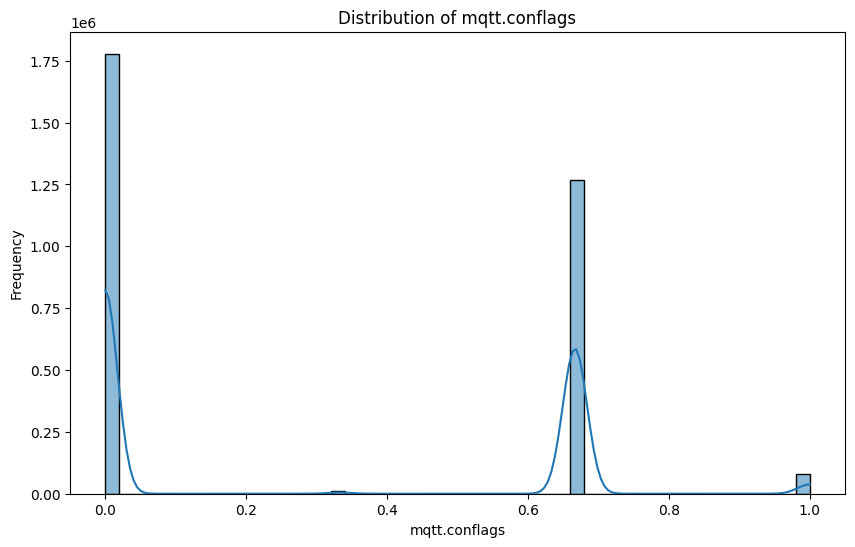



Column: mqtt.hdrflags
Number of values close to 0: 1747905
Percentage of values close to 0: 55.67%


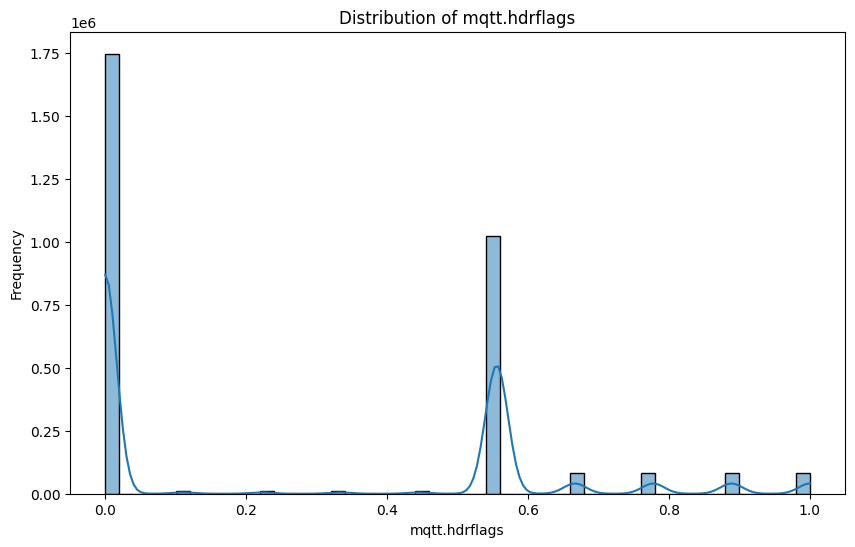



Column: mqtt.len
Number of values close to 0: 2863353
Percentage of values close to 0: 91.19%


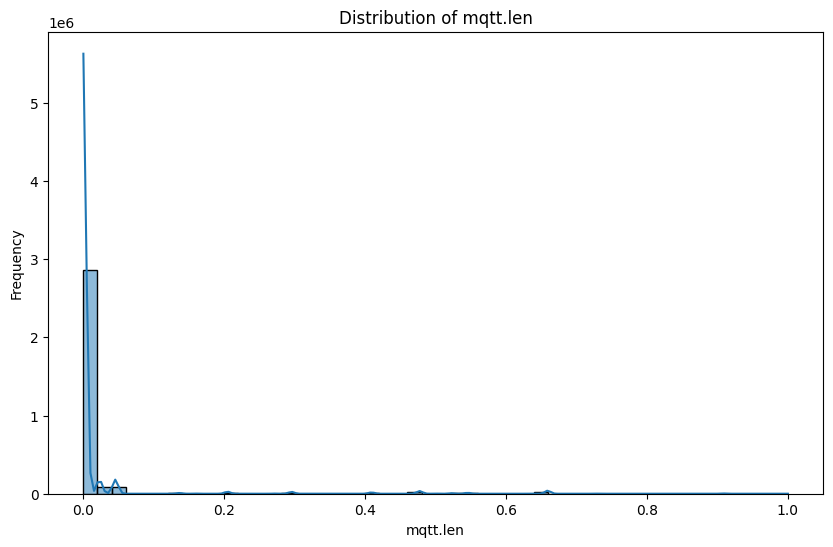



Column: mqtt.msgtype
Number of values close to 0: 2773325
Percentage of values close to 0: 88.32%


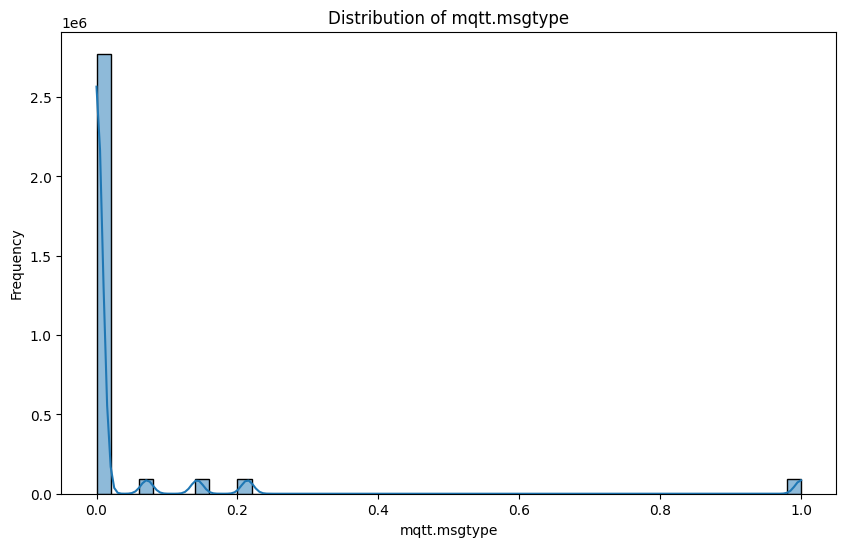



Column: mqtt.proto_len
Number of values close to 0: 3046156
Percentage of values close to 0: 97.01%


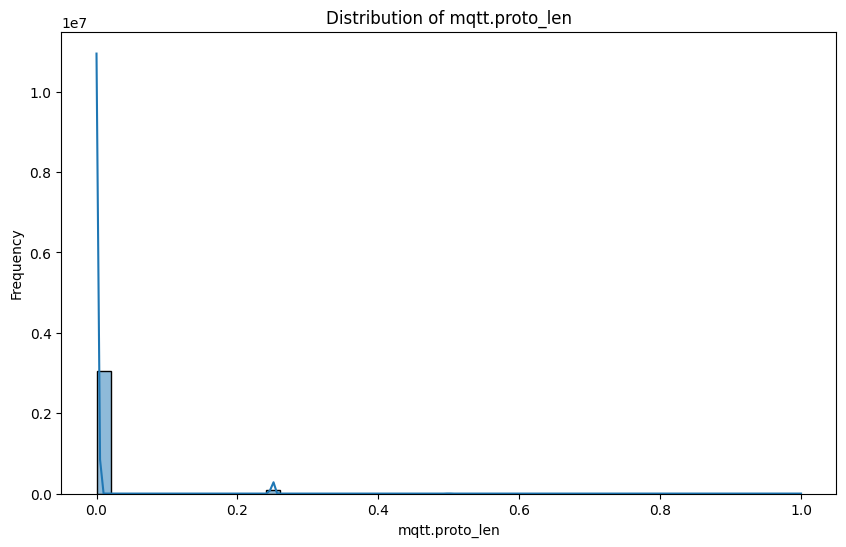



Column: mqtt.protoname
Number of values close to 0: 1587264
Percentage of values close to 0: 50.55%


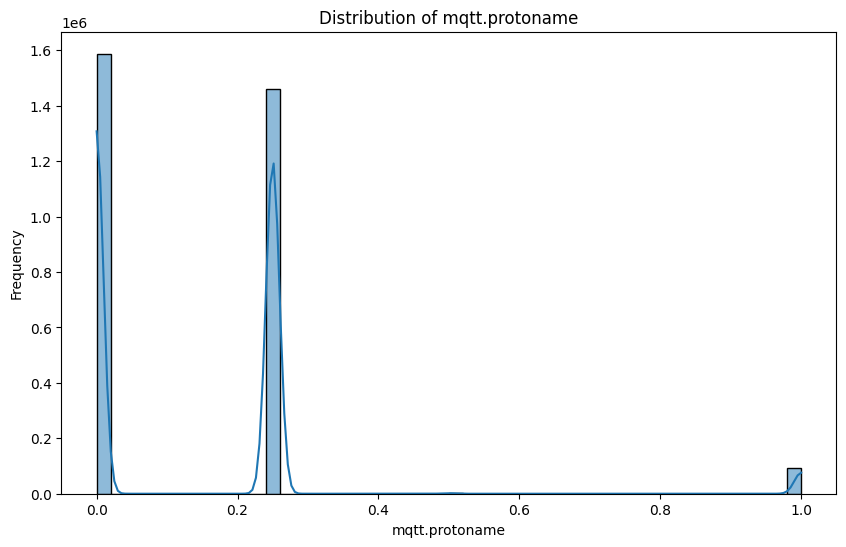



Column: mqtt.topic
Number of values close to 0: 1587264
Percentage of values close to 0: 50.55%


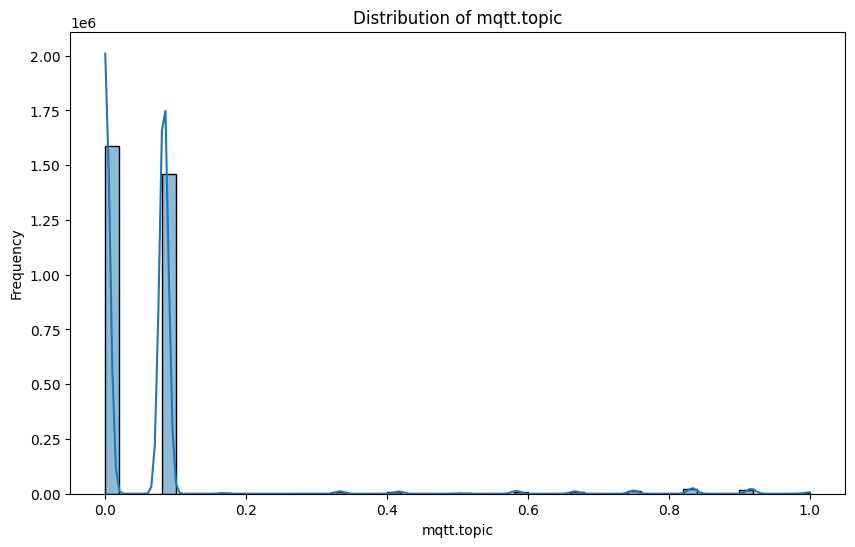



Column: mqtt.topic_len
Number of values close to 0: 3048554
Percentage of values close to 0: 97.09%


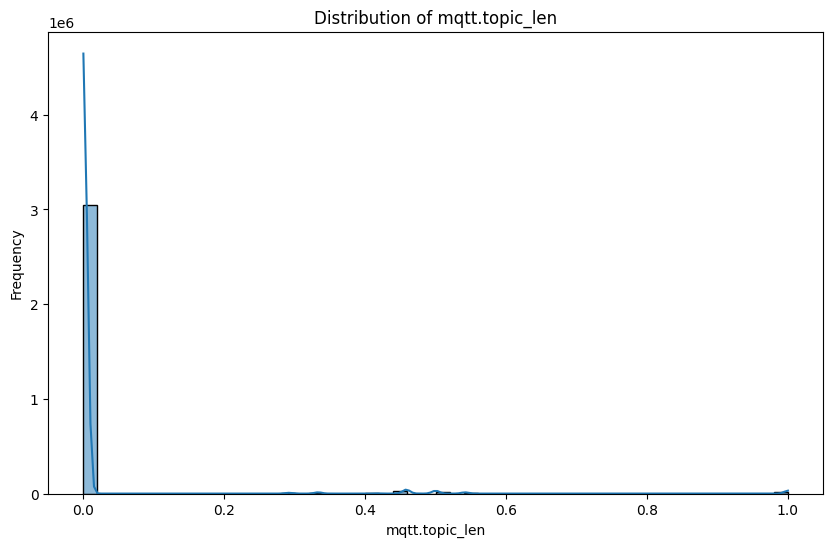



Column: mqtt.ver
Number of values close to 0: 3035922
Percentage of values close to 0: 96.68%


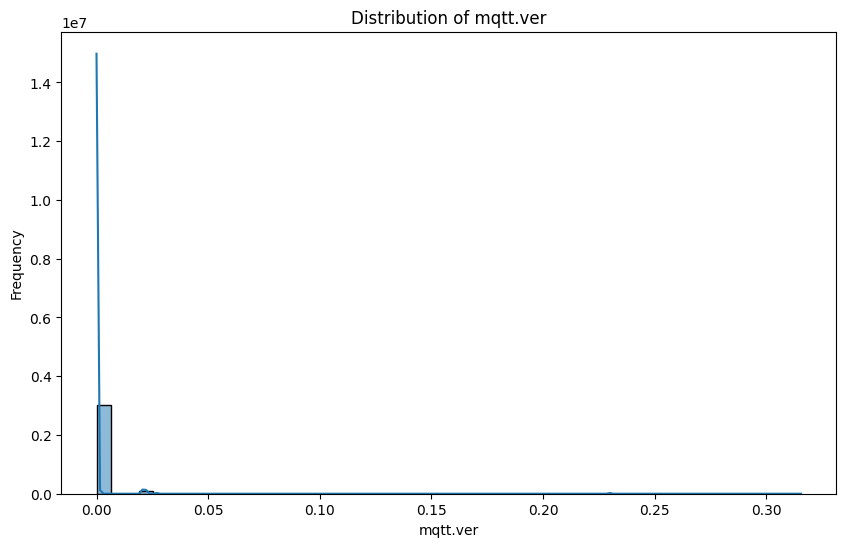



Column: mbtcp.len
Number of values close to 0: 3125908
Percentage of values close to 0: 99.55%


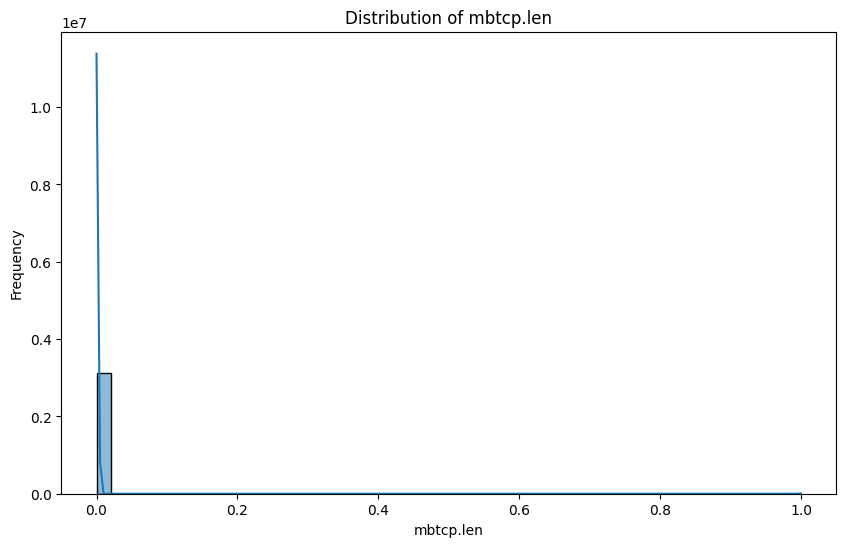



Column: mbtcp.trans_id
Number of values close to 0: 3127899
Percentage of values close to 0: 99.61%


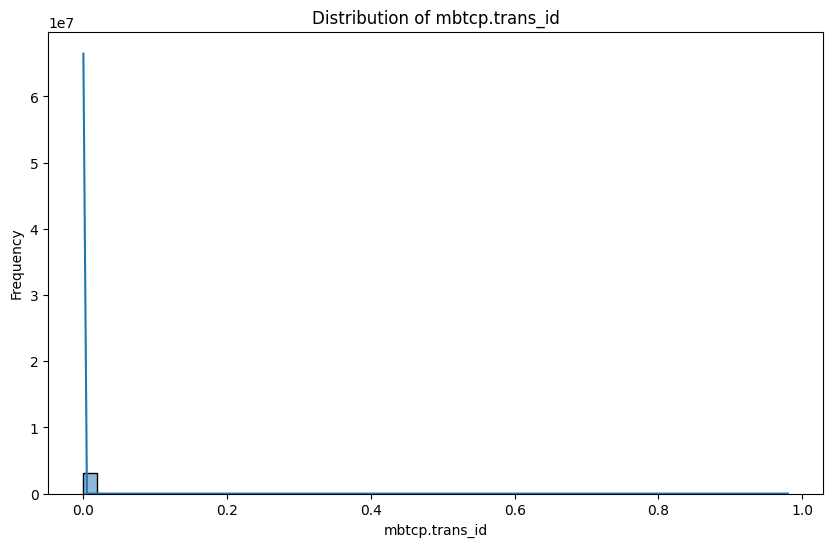



Column: Label
Number of values close to 0: 1570015
Percentage of values close to 0: 50.00%


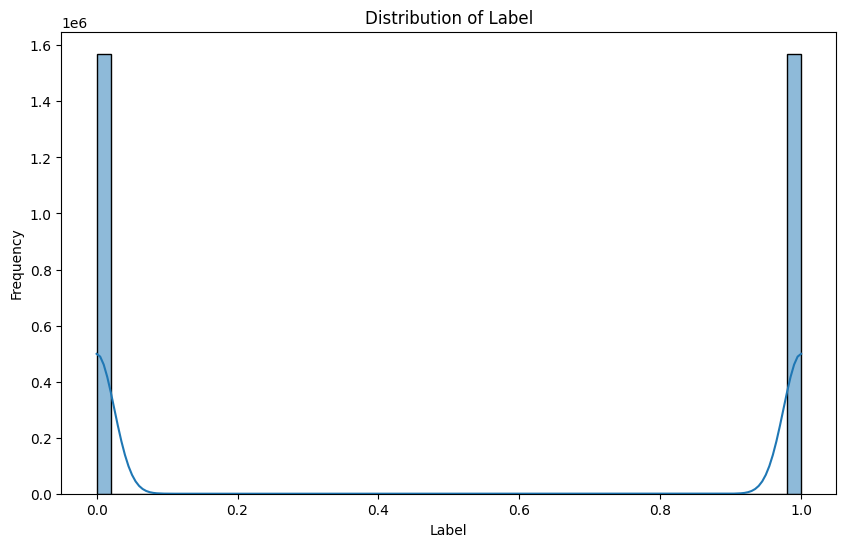

In [5]:
# Function to count values close to 0
def count_values_close_to_zero(series, threshold=1e-6):
    return (np.abs(series) < threshold).sum()

# Analyze each column
zero_counts = {}
for column in data.columns:
    zero_count = count_values_close_to_zero(data[column])
    zero_percentage = zero_count / len(data) * 100
    zero_counts[column] = zero_percentage
    print(f"Column: {column}")
    print(f"Number of values close to 0: {zero_count}")
    print(f"Percentage of values close to 0: {zero_percentage:.2f}%")
    
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], bins=50, kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()
    print("\n")

## Bar Plot of Percentage of Data Close to 0
Show a bar plot of the percentage of values close to 0 for each feature.

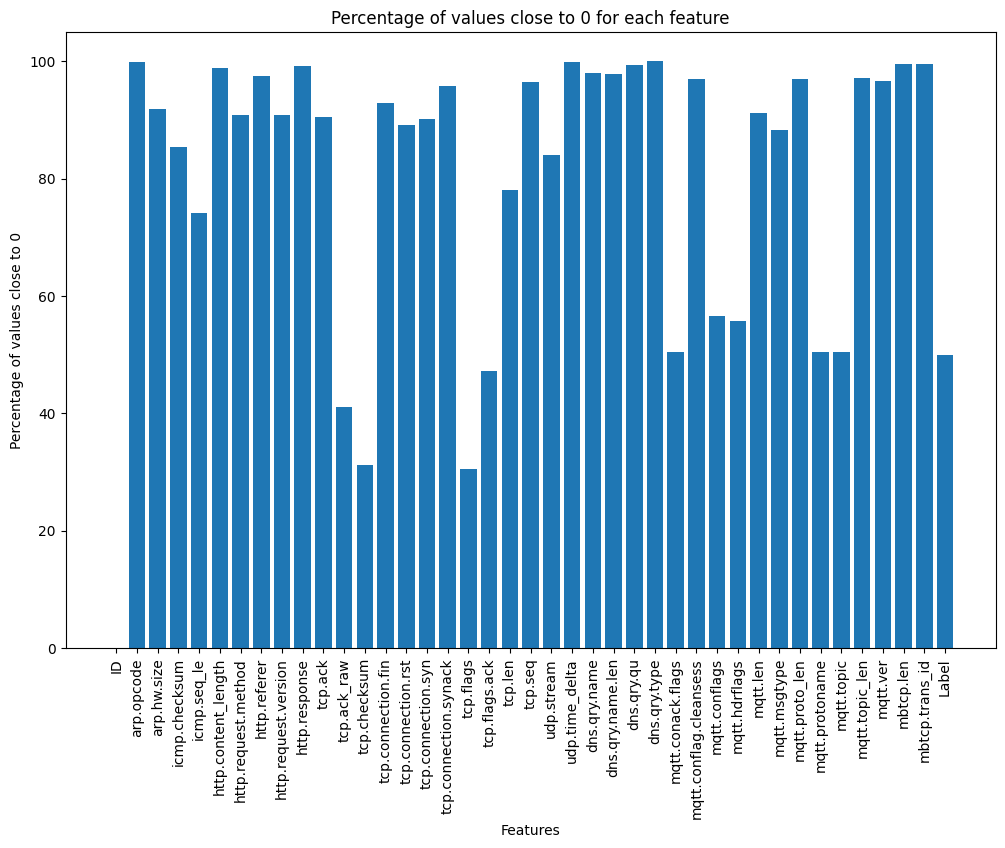

In [6]:
# Bar plot of percentage of values close to 0
plt.figure(figsize=(12, 8))
plt.bar(zero_counts.keys(), zero_counts.values())
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Percentage of values close to 0')
plt.title('Percentage of values close to 0 for each feature')
plt.show()

## Correlation Matrix
Show the correlation matrix to understand the relationships between different features.

In [ ]:
# Correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Boxplots for Outlier Detection
Boxplots can help in detecting outliers in each column.

In [ ]:
# Boxplots for each column
for column in data.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[column])
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)
    plt.show()
    print("\n")

## Pairplot for Feature Relationships
Visualize relationships between features using pairplots.

In [ ]:
# Pairplot
sns.pairplot(data)
plt.show()